### We will take into account various input features 
### like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, 
###            total sulfur dioxide, density, pH, sulphates, alcohol.
###  Based on these features we will predict the quality of the wine.
## dataset Link : 
#### https://drive.google.com/file/d/195gkZ5cTZL11L308MHc7EyBbAoiB4xqf/view

### import All Required libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### import Data set using following command

In [60]:
df = pd.read_csv('C:\\Users\\Sunny\\Downloads\\winequality.csv')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


### shape of the Dataset & and check whethr dataset has any null values

In [61]:
print(df.shape)
print(df.isnull().sum())

(1599, 12)
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Dataset has 1599 rows  and 12 columns and data has no any null value

### To see the statistical details of the datase, we use .describe()

In [62]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## chek the correlation of each variable to another using .corr()

In [63]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### visualization of variable named with 'quality'

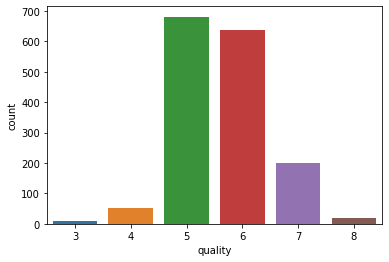

In [64]:
sns.countplot(x='quality' ,data=df)

### As per visualization our optput variable doesn't have any continuous value rather than discrete values.
### this problem must be included in classification problem.
### But just for practising we perform as Linear Problem

## Values of independent variable stored in variable x
## Values of dependent variable stored in variable y

In [65]:
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

### Spilt the whole data into training and testing data, using the following code
### 90% of data will be in moved in training data to fit the model rest will be in test data

In [66]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.1)

In [67]:
ss = MinMaxScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

### Now call the .fit() function of the LinearRegression class to fit the model using trai_x, train_y valuesss...¶

In [68]:
lr = LinearRegression()
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### the model has been fitted , the now the values of y-intercept and coefficient using following codde¶

In [69]:
print('Coefficient is : ',lr.coef_, '\n')

print('Y-intercept is : ',lr.intercept_)

Coefficient is :  [ 0.23782893 -1.75115216 -0.22195813  0.06806268 -1.03767337  0.31189424
 -0.86541002 -0.07775817 -0.53787395  1.48685639  1.8127883 ] 

Y-intercept is :  5.7065412261084045


### predict the values of test_x for testing the model

In [70]:
y_pred = lr.predict(test_x)

### create a dataframe of Actual value and Predicted value of test_y

In [71]:
df1 = pd.DataFrame({'Actual values' : test_y, 
                    'Predicted values' : y_pred})
df1.head()

,Actual values,Predicted values
0,5,5.986957
1,5,5.734388
2,5,5.561268
3,7,6.135711
4,7,6.132800


## The final step is to evaluate the performance of the algorithm.

## For regression algorithms, three evaluation metrics are commonly used:
####   1. Mean Absolute Error 
####   2. Mean Squared Error
####   3. Root Mean Squared Error

In [72]:
## import modules to check evalution matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [73]:
mse = mean_squared_error(test_y, y_pred) *100
print('Mean Squared Error : ', mse)

Mean Squared Error :  37.7145547857953


In [74]:
mae = mean_squared_error(test_y, y_pred) *100
print('Mean Absolute Error : ', mae)

Mean Absolute Error :  37.7145547857953


In [75]:
print('Root Mean Squared error : ', (mse**0.5))

Root Mean Squared error :  6.141217695685058


## make a data frame of errors

In [76]:
error = pd.DataFrame([mse, mae, (mse**0.5)], index=['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared error'], 
             columns=['Error'])
error

,Error
Mean Squared Error,37.714555
Mean Absolute Error,37.714555
Root Mean Squared error,6.141218


### check the Accuracy of model

In [77]:
from sklearn.metrics import r2_score

In [78]:
print('accuray of model : ', r2_score(test_y, y_pred) * 100)

accuray of model :  37.07686375675445


# accoring to Accuracy % we can say this model is not perfectly suitable for this problem
## but still make suitable predictions

# let's check accuracy score using 'Random forest Regressor' 

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(train_x, train_y,)
r2_score(test_y, rf_reg.predict(test_x))

0.5346006256517206

## So According to accuracy score higher in Randaom forset than M.L.R. 
## we say the Random Forest Regressor is more preferable than M.L.R